# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

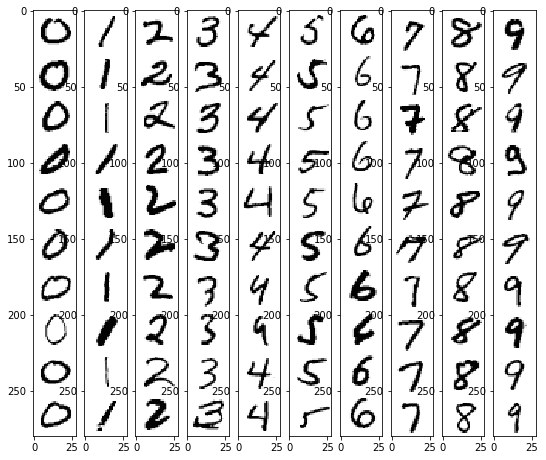

In [3]:
def P1(num_examples=10):
    ### STUDENT START ###
    # helper function to display a matrix of digits
    def my_show_img_mat(feature_vectors_dict, img_px):
        num_plots = len(feature_vectors_dict.keys())
        plt.figure(figsize=(9,9))
        for key, feature_vector in feature_vectors_dict.items():
            temp_mat = np.reshape(feature_vector, (-1, img_px))
            temp_plot = plt.subplot(1, num_plots, key+1)
            temp_plot.imshow(temp_mat, cmap='Greys')
    
    # initiates the dictionary that will hold the examples
    img_px = 28
    my_exp_dict = dict()
    for i in np.unique(mini_train_labels):
        my_exp_dict[i] = np.empty((0,img_px*img_px), int)

    # for each number 0 to 9, finds examples
    num_examples = 10
    for i in np.unique(mini_train_labels):
        # ... gets the indexes of the examples from the labels array
        indexes_of_numbers = np.where(mini_train_labels==i)

        # ... get the feature vectors of each example 
        for j in indexes_of_numbers[0][:num_examples]:
            temp_img = mini_train_data[j:j+1]
            my_exp_dict[i] = np.append(my_exp_dict[i], temp_img, axis=0)

    # prints the matrix of examples
    my_show_img_mat(my_exp_dict, img_px)
    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    ### STUDENT START ###
    # for each k value, predicts, fits, and prints the results of the K-NN
    my_classifiers = dict()
    for k_value in k_values:
        # fits classifier to mini train data set
        my_classifier = KNeighborsClassifier(n_neighbors=k_value)
        my_classifier.fit(mini_train_data, mini_train_labels)
        # stores classifier in a dict for future use
        my_classifiers[k_value] = my_classifier
        # prints basic accuracy against the dev data set, just to see how its performing
        accuracy = my_classifier.score(dev_data, dev_labels)
        print(accuracy)

    # gets the 1-NN classifier, and makes predictions on dev data set
    # prints the precision, recall, and F1 for each label
    my_predictions = my_classifiers[1].predict(dev_data)
    print(classification_report(my_predictions, dev_labels))
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

0.888
0.878
0.869
0.865
0.863
             precision    recall  f1-score   support

        0.0       0.98      0.91      0.94       107
        1.0       1.00      0.89      0.94       118
        2.0       0.79      0.99      0.88        82
        3.0       0.87      0.77      0.82        97
        4.0       0.82      0.89      0.85        96
        5.0       0.84      0.93      0.88        82
        6.0       0.96      0.94      0.95       100
        7.0       0.92      0.89      0.90       117
        8.0       0.88      0.94      0.91        89
        9.0       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000



In [9]:
print(dev_data.shape)
print(dev_labels.shape)
print(type(dev_data))
print(type(dev_labels))
print(dev_labels[1:2])

(1000, 784)
(1000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 3.]


ANSWER: The basic accuracy decreases, the more neighbors we use in our classifier. The digit 9 appears to be the most difficult; it has the lowest F1 score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
    ### STUDENT START ###
    # declares a list of durations we will use later
    durations = []
    # gets a 1-NN classifier
    my_classifier = KNeighborsClassifier(n_neighbors=1)
    # for each of the training sizes, grabs the subset of train data, 
    # fits the subset of train data, 
    # and then caluculates the basic accuracy against the dev data set
    for train_size in train_sizes:
        train_data_subset = train_data[:train_size]
        train_labels_subset = train_labels[:train_size]
        
        # starts the timer for fitting
        start_time = time.time()
        
        # fits the model to the subset data
        my_classifier.fit(train_data_subset, train_labels_subset)
        
        # calcuates the duration for fitting
        duration = time.time() - start_time
        durations.append(duration)
        
        # calculates the basic accuracy and appends to the array of accuracies
        accuracy = my_classifier.score(dev_data, dev_labels)
        accuracies.append(accuracy)
    
    print(train_sizes)
    print(accuracies)
    print(durations)
    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

[100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
[0.71999999999999997, 0.78600000000000003, 0.84099999999999997, 0.88400000000000001, 0.90200000000000002, 0.92600000000000005, 0.93700000000000006, 0.95899999999999996, 0.96999999999999997]
[0.0015001296997070312, 0.003000497817993164, 0.0070002079010009766, 0.022002696990966797, 0.06750893592834473, 0.20102500915527344, 0.6810851097106934, 1.833230972290039, 5.853738784790039]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

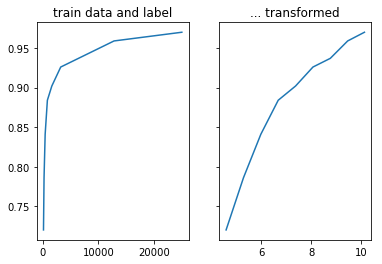

[ 1.24307226]
[ 1.03386514]


In [6]:
def P4():
    ### STUDENT START ###
    # uses the train sizes list from the previous problem, but as a feature matrix
    my_train_data_1d = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
    my_train_data = [[100], [200], [400], [800], [1600], [3200], [6400], [12800], [25000]]
    # the accuracies vector from previous problem
    my_train_label = [0.71999999999999997, 0.78600000000000003, 0.84099999999999997, 0.88400000000000001, 0.90200000000000002, 0.92600000000000005, 0.93700000000000006, 0.95899999999999996, 0.96999999999999997]
    
    #vizualizes the plot of the data
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(my_train_data_1d, my_train_label)
    ax1.set_title('train data and label')
    ax2.plot(np.log(my_train_data_1d), my_train_label)
    ax2.set_title('... transformed')
    plt.show()
    
    # fits a  linear regression model to the train data
    my_model = LinearRegression()
    my_model.fit(my_train_data, my_train_label)
    # predicts the accuracy of the model given a training size of n=60000
    my_prediction = my_model.predict([[60000]])
    print(my_prediction)
    
    # tries to fit model to the transformed data
    my_train_data_log = []
    for feature_vector in my_train_data:
        feature0 = feature_vector[0]
        new_feature_vector = [np.log(feature0)]
        my_train_data_log.append(new_feature_vector)
        
    my_model.fit(my_train_data_log, my_train_label)
    my_prediction = my_model.predict([[np.log(60000)]])
    print(my_prediction)
    ### STUDENT END ###


P4()

ANSWER: The underlying model is probably not a simple line, because we'd expect accuracy to stop increasing at 100%. The plot of sample size and accuracy suggests a log relationship. Thus, we might want to use a log transform on the number of samples, to deskew the data. In any case, having a train sample size of 60k seems to suggest 100% accuracy.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

prediction: 4.0
true label: 9.0


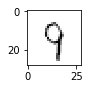

prediction: 3.0
true label: 8.0


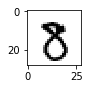

prediction: 4.0
true label: 6.0


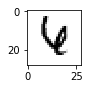

prediction: 6.0
true label: 0.0


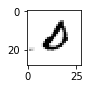

prediction: 1.0
true label: 7.0


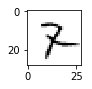

In [7]:
def P5():
    ### STUDENT START ###
    # helper function to display a digit
    def my_show_img(feature_vector, img_px):
        plt.figure(figsize=(1,1))
        temp_mat = np.reshape(feature_vector, (-1, img_px))
        plt.imshow(temp_mat, cmap='Greys')
        plt.show()
    
    # gets a 1-NN classifier and fits it to the mini-train set
    my_classifier = KNeighborsClassifier(n_neighbors=1)
    my_classifier.fit(mini_train_data, mini_train_labels)
    predictions = my_classifier.predict(dev_data)
    # calculates and prints the confusion matrix
    my_confusion_mat = confusion_matrix(dev_labels, predictions)
    
    # uses the confusion matrix to identify the most confused pair of digits
    indexes_of_incorrect_predictions = np.where(dev_labels!=predictions)
    
    # transforms the feature vectors and prints some of the mismatches
    img_px = 28
    subset_of_indexes = indexes_of_incorrect_predictions[0][0:5]
    for i in subset_of_indexes:
        print("prediction: {}".format(predictions[i]))
        print("true label: {}".format(dev_labels[i]))
        feature_vector = dev_data[i]
        my_show_img(feature_vector, img_px)
    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def P6():
    ### STUDENT START ###
    from scipy.ndimage.filters import gaussian_filter
    
    # creates a 1-NN classifier
    my_classifier = KNeighborsClassifier(n_neighbors=1)
    
    # preprocesses the training data but not the dev data
    blurred_train_data = []
    for feature_vector in train_data:
        temp_blurred = gaussian_filter(input=feature_vector, sigma=1)
        blurred_train_data.append(temp_blurred.tolist())
    
    # ... fits the model and prints the accuracy report
    my_classifier.fit(blurred_train_data, train_labels)
    my_predictions = my_classifier.predict(dev_data)
    print("preprocessed the training data but not the dev data")
    print(classification_report(my_predictions, dev_labels))
    
    
    
    # preprocesses the dev data but not the training data
    blurred_dev_data = []
    for feature_vector in dev_data:
        temp_blurred = gaussian_filter(input=feature_vector, sigma=1)
        blurred_dev_data.append(temp_blurred.tolist())
    
    # ... fits the model and prints the accuracy report
    my_classifier.fit(train_data, train_labels)
    my_predictions = my_classifier.predict(blurred_dev_data)
    print("preprocessed the dev data but not the training data")
    print(classification_report(my_predictions, dev_labels))
    
    
    
    # preprocesses both training and dev data
    # ... fits the model and prints the accuracy report
    my_classifier.fit(blurred_train_data, train_labels)
    my_predictions = my_classifier.predict(blurred_dev_data)
    print("preprocessed both training and dev data")
    print(classification_report(my_predictions, dev_labels))
    
    ### STUDENT END ###

P6()

preprocessed the training data but not the dev data
             precision    recall  f1-score   support

        0.0       1.00      0.97      0.99       102
        1.0       1.00      0.99      1.00       106
        2.0       0.96      0.99      0.98        99
        3.0       0.97      0.97      0.97        86
        4.0       1.00      0.98      0.99       106
        5.0       0.95      0.99      0.97        87
        6.0       0.98      0.99      0.98        97
        7.0       0.96      0.98      0.97       111
        8.0       0.99      0.98      0.98        97
        9.0       0.99      0.96      0.98       109

avg / total       0.98      0.98      0.98      1000

preprocessed the dev data but not the training data
             precision    recall  f1-score   support

        0.0       1.00      0.97      0.99       102
        1.0       1.00      0.99      1.00       106
        2.0       0.95      0.98      0.97        99
        3.0       0.97      0.91      0.94  

ANSWER: Applying the gaussian blur to the training data only, or applying the gaussian blur to both the training and dev data seemed to help slightly. The F1 scores for each of the digits seem to be a bit better. Applying the blur to the dev data only seems to perform the worst out of the three methods.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():
    ### STUDENT START ###
    # helper function to display a digit
    def my_show_img(feature_vector, img_px):
        plt.figure(figsize=(12,12))
        temp_mat = np.reshape(feature_vector, (-1, img_px))
        plt.imshow(temp_mat, cmap='Greys')
        plt.show()
    
    # binary data
    # binarize=0.0 treats any feature with a value greater than 0 as 1, otherwise 0
    bnb_classifier = BernoulliNB(binarize=0.0)
    bnb_classifier.fit(mini_train_data, mini_train_labels)
    my_predictions = bnb_classifier.predict(dev_data)
    accuracy = bnb_classifier.score(dev_data, dev_labels)
    print(accuracy)
    print(classification_report(my_predictions, dev_labels))
    
    # multinomial data
    # helper function for making bins
    def make_bins(feature_vector):
        binned_feature_vector = []
        for val in feature_vector:
            if val < 0.33:
                binned_feature_vector.append(0)
            elif val >= 0.33 and val < 0.66:
                binned_feature_vector.append(1)
            else:
                binned_feature_vector.append(2)
        return binned_feature_vector
    
    # needs to make the feacture vectors into binned versions
    binned_mini_train_data = []
    for feature_vector in mini_train_data:
        temp_binned_feature_vector = make_bins(feature_vector)
        binned_mini_train_data.append(temp_binned_feature_vector)
    #my_show_img(mini_train_data[24],28)
    #my_show_img(binned_mini_train_data[24],28)
    
    mnb_classifier = MultinomialNB()
    mnb_classifier.fit(binned_mini_train_data, mini_train_labels)
    my_predictions = mnb_classifier.predict(dev_data)
    accuracy = mnb_classifier.score(dev_data, dev_labels)
    print(accuracy)
    print(classification_report(my_predictions, dev_labels))
    ### STUDENT END ###

P7()

0.815
             precision    recall  f1-score   support

        0.0       0.97      0.88      0.92       109
        1.0       0.96      0.86      0.91       118
        2.0       0.78      0.87      0.82        92
        3.0       0.74      0.63      0.68       102
        4.0       0.78      0.89      0.83        91
        5.0       0.63      0.81      0.71        70
        6.0       0.89      0.87      0.88       100
        7.0       0.76      0.91      0.83        94
        8.0       0.77      0.74      0.76       100
        9.0       0.84      0.72      0.77       124

avg / total       0.82      0.81      0.82      1000

0.798
             precision    recall  f1-score   support

        0.0       0.96      0.90      0.93       106
        1.0       0.92      0.89      0.91       109
        2.0       0.80      0.85      0.82        97
        3.0       0.74      0.63      0.68       102
        4.0       0.70      0.90      0.79        81
        5.0       0.55      0.

ANSWER: ??? this can't be right, MultinomialNB is supposed to perform better ... Perhaps it is performing worse because the binning is actually removing details that the shading holds, e.g. especially for relatively complex digits like 5 or 8, two examples that suffered a drop in f1 score

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:801: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:820: RuntimeWarning: divide by zero encountered in log
  neg_prob =

[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
[0.092, 0.82, 0.82, 0.82, 0.821, 0.819, 0.812, 0.81, 0.775]


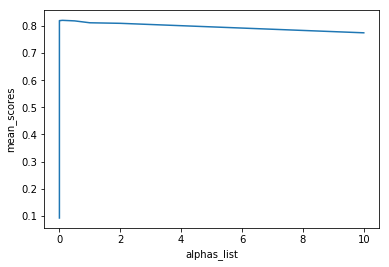

In [68]:
def P8(alphas):
    ### STUDENT START ###
    # uses the alphas parameter grid dictionary in the grid search
    alphas_list = alphas['alpha']
    
    # creates the bernouli classifier
    bnb_classifier = BernoulliNB(binarize=0.0)
    #bnb_classifier = BernoulliNB()
    
    # passes the classifier into the grid search object, then tries to fit the alphas
    gscv = GridSearchCV(estimator=bnb_classifier, param_grid=alphas)
    gscv.fit(mini_train_data, mini_train_labels)
    #print(gscv.grid_scores_[0])
    #print(gscv.grid_scores_[0].parameters)
    #print(gscv.grid_scores_[0].mean_validation_score)
    
    
    # plots the grid scores to visuzally show the best one
    mean_scores = []
    for score in gscv.grid_scores_:
        temp = score.mean_validation_score
        mean_scores.append(temp)
    
    print(alphas_list)
    print(mean_scores)
    plt.plot(alphas_list, mean_scores)
    plt.xlabel('alphas_list')
    plt.ylabel('mean_scores')
    
    # returns a dictionary the best value(s) for alpha
    ans = dict()
    ans['best_params_'] = alphas_list[1:4]
    return ans
    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

In [49]:
print(nb['best_params_'])

[0.0001, 0.001, 0.01]


ANSWER: Alphas of 0.0001, 0.001, and 0.01 seems to have the best accuracy, at 82%; the more smoothing we add, the gradually worse the accuracy of the classifier. An alpha of 0 gives us only an accuracy of 9%. The jump in accuracy when given a tiny bit of smoothing is quite surprising to me, because I would have expected maybe a gradual increase, then decrease. However, the gradual decrease when alpha > 0 is perhaps less surprising, because the more smoothing we do, the more information we are discarding.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

accuracy of gaussian classifier, without noise:  0.621


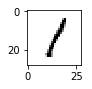

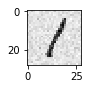

accuracy of gaussian classifier, with noise:  0.789


In [111]:
def P9():
    ### STUDENT END ###
    
    # helper function to display a digit
    def my_show_img(feature_vector, img_px):
        plt.figure(figsize=(1,1))
        temp_mat = np.reshape(feature_vector, (-1, img_px))
        plt.imshow(temp_mat, cmap='Greys')
        plt.show()
    
    def add_noise(my_train_data):
        '''helper function that adds some noise to the feature vectors, so that they work with noise.
        Arbitrary choice of using mean 0, standard deviation 0.1 for the noise distribution'''
        my_noisy_train_data = []
        for feature_vector in my_train_data:
            noise = np.random.normal(0,0.1,len(feature_vector))
            temp = feature_vector + noise
            my_noisy_train_data.append(temp.tolist())
        return my_noisy_train_data
    
    # creates the gaussian classifier, fits using the mini train set, and evaluates against the dev set
    gaussian_classifier_01 = GaussianNB()
    gaussian_classifier_01.fit(mini_train_data, mini_train_labels)
    predictions = gaussian_classifier_01.predict(dev_data)
    accuracy = gaussian_classifier_01.score(dev_data, dev_labels)
    #print(predictions[0])
    #print(dev_labels[0])
    #print(gaussian_classifier_01.theta_[0])
    #print(gaussian_classifier_01.sigma_[0])
    print("accuracy of gaussian classifier, without noise: ", accuracy)
    
    # creates another gaussian classifier, fits using the mini train set, and evaluates against the dev set
    # per advice from officer hours, we should add some noise random, so the white background isn't all 0s
    # noise should be from a normal distribution
    
    img_px = 28
    
    # adds some normal noise to the train data
    noisy_train_data = add_noise(mini_train_data)
    
    # show a before and after example
    my_show_img(mini_train_data[0], img_px)
    my_show_img(noisy_train_data[0], img_px)
    
    # trains another gaussian classifier, and fits it the same way as before
    gaussian_classifier_02 = GaussianNB()
    gaussian_classifier_02.fit(noisy_train_data, mini_train_labels)
    predictions = gaussian_classifier_02.predict(dev_data)
    accuracy = gaussian_classifier_02.score(dev_data, dev_labels)
    #print(predictions[0])
    #print(dev_labels[0])
    print("accuracy of gaussian classifier, with noise: ", accuracy)
    
    ### STUDENT END ###

gnb = P9()

ANSWER: As recommended by office hours, adding some normally distributed noise to the feature vectors improves the accuracy, from roughly 62% to roughly 78%. This worked before the Gaussian classifier expects features that are normally distributed. But looking at the theta and sigma of the original feature vectors, they had too many features that were 0, white.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


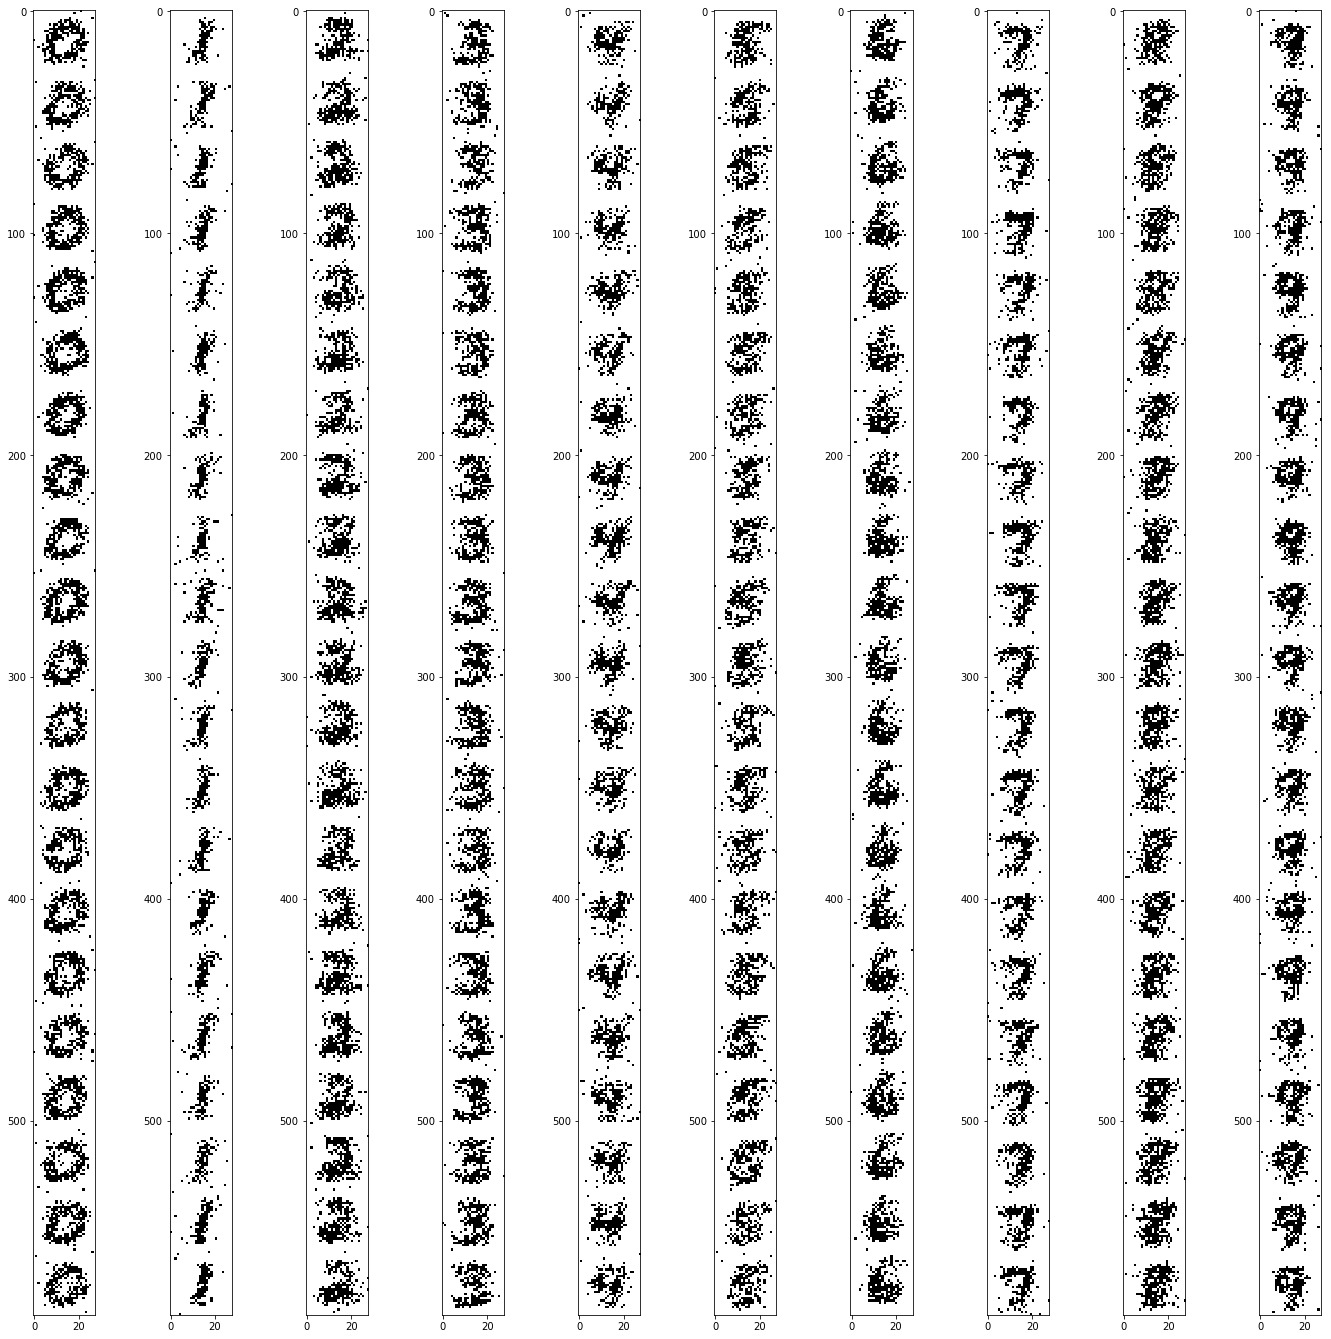

In [113]:
def P10(num_examples):
    ### STUDENT START ###
    
    # creates and trains a bernouli naive bayes classifier
    bnb_classifier = BernoulliNB(binarize=0.0)
    bnb_classifier.fit(mini_train_data, mini_train_labels)
    # gets the list of probabilities for each digit's class
    feature_probabilities = np.exp(bnb_classifier.feature_log_prob_)
    
    # helper function to display a matrix of digits
    def my_show_img_mat(feature_vectors_dict, img_px):
        num_plots = len(feature_vectors_dict.keys())
        plt.figure(figsize=(24,24))
        for key, feature_vector in feature_vectors_dict.items():
            temp_mat = np.reshape(feature_vector, (-1, img_px))
            temp_plot = plt.subplot(1, num_plots, key+1)
            temp_plot.imshow(temp_mat, cmap='Greys')
    
    def create_example_image(pixel_probability_list):
        '''
        Helper function to generate a black or white pixel image feature vector.
        Loops through the feature probabilities list and creates a black pixel, 
        if a random number is lower than the probability of a pixel being in that position,
        otherwise creates a white pixel
        '''
        temp = []
        for j in pixel_probability_list:
            if np.random.rand() < j:
                temp.append(1)
            else:
                temp.append(0)
        return temp
    
    # generates some new examples using the feature probabilities matrix
    img_px = 28
    num_examples = 20
    examples_dict = dict()
    # for every label in the train set, i.e. 0 to 9, generates some examples
    for label in np.unique(mini_train_labels):
        # ... for each example, creates an example image based on feature probabilities list for that label
        examples = []
        for i in range(num_examples+1):
            example_image = create_example_image(feature_probabilities[label])
            examples.append(example_image)
        # adds list of examples to the dictionary of examples
        examples_dict[label] = examples
        
    # finally shows the matrix of examples
    my_show_img_mat(examples_dict,img_px)
    
    ### STUDENT END ###

P10(20)

ANSWER: the generated digits appear to be much more noisy vs the training digits

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [119]:
def P11(buckets, correct, total):
    ### STUDENT START ###
    
    #creates a bernoulli NB classifier, fits it to the mini train data, and makes predictions against the dev data
    bnb_classifier = BernoulliNB(alpha=0.1, binarize=0.0)
    bnb_classifier.fit(mini_train_data, mini_train_labels)
    predictions = bnb_classifier.predict(dev_data)
    
    # for each posterior bucket, estimates the classifier's accuracy
    for prediction in predictions[:10]:
        print(prediction)
        # somehow calculate the posterior probability P(Y = y | X) = P(X|Y) * P(Y) / P(X)
        # not sure how this maps to our scenario here ...
        
        
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

4.0
3.0
6.0
3.0
6.0
6.0
4.0
4.0
3.0
1.0
p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9990000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999900000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999000000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999990000    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999900    total =   0    accuracy = 0.000
p(pred) <= 0.9999999999999    total =   0    accuracy = 0.000
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()